<a href="https://colab.research.google.com/github/sierragl2019/Primer-repositorio/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea 2 
Analisis de datos
Lizeth Araceli Sierra González

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plot
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import folium
import seaborn as sns
import json
%matplotlib inline

In [ ]:
import plotly.express as px
import requests

In [ ]:
# Obtener los datos
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Natalidad_Mexico.csv')
df.head()

,estado,Total,Hombres,Mujeres,No especificado,year,Unnamed: 6
0,Aguascalientes,26583,13603,12980,0,2010,NaN
1,Baja California,63559,32264,31295,0,2010,NaN
2,Baja California Sur,13988,7076,6912,0,2010,NaN
3,Campeche,20380,10230,10150,0,2010,NaN
4,Coahuila de Zaragoza,56972,28879,28093,0,2010,NaN


In [ ]:
#Eliminar NaN

dat=df.dropna(axis=1, how='any') 

In [ ]:
#sns.pairplot(data)

In [ ]:
#sns.pairplot(data, hue="estado", height=1.5, palette='plasma');

<Axes: xlabel='year', ylabel='Hombres'>

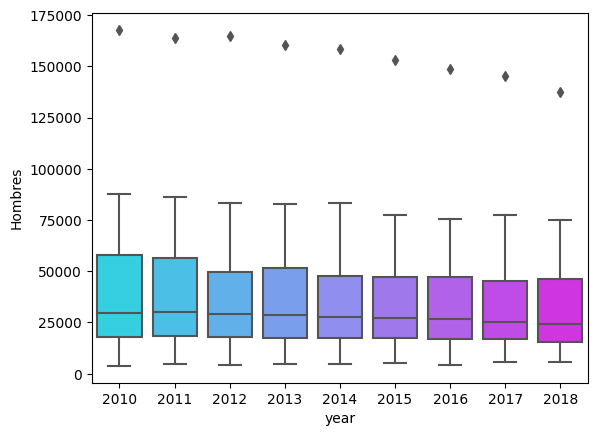

In [ ]:
sns.boxplot(dat, x="year", y="Hombres", palette='cool')

<Axes: xlabel='year', ylabel='Mujeres'>

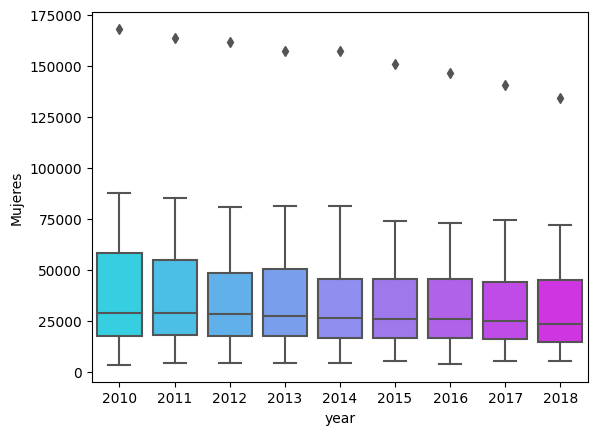

In [ ]:
sns.boxplot(dat, x="year", y="Mujeres", palette='cool')

<Axes: xlabel='year', ylabel='Total'>

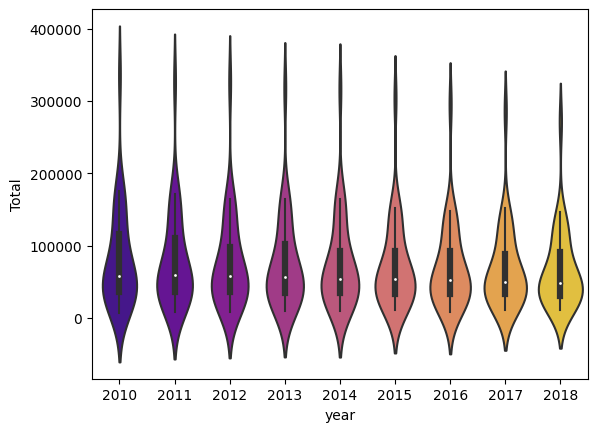

In [ ]:
sns.violinplot(dat, x="year", y="Total", palette='plasma')

In [ ]:
#Grafica Hue

df1=dat[(dat['estado'] == 'Aguascalientes')]
df2=dat[(dat['estado'] == 'Colima')]
df3=pd.concat([df1, df2])

<Axes: xlabel='estado', ylabel='Hombres'>

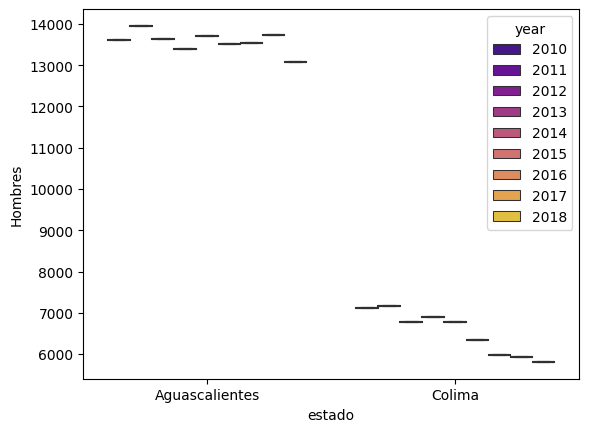

In [ ]:
#sns.violinplot(df3, x="year", y="Total",hue='estado', palette='plasma')
sns.boxplot(df3, x="estado", y='Hombres',hue='year', palette='plasma')

<ipython-input-16-18cc704ed6e1>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

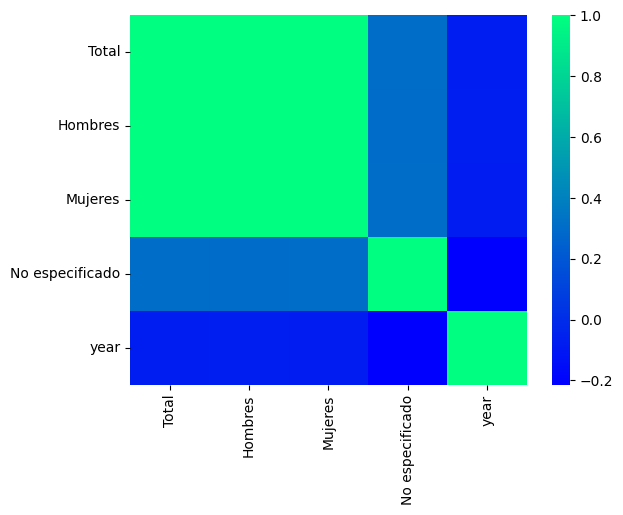

In [ ]:
sns.heatmap(dat.corr(), cmap='winter')

In [ ]:
url='https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'

In [ ]:
m = folium.Map(location=[22, -50], zoom_start=2, width='100%', height='100%',position='bottomLeft')

In [ ]:
datos2010=dat[(dat['year'] == 2010)]

dat1= datos2010[['estado']]
dat2= datos2010[['Total']]
dat1['Total']=dat2
dat3=dat1.drop(32)
data_map=dat3

<ipython-input-20-61187b8674d5>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
folium.Choropleth(geo_data=url,name='choropleth',data=data_map,columns=['estado', 'Total'],key_on='feature.properties.name',fill_color='Blues',fill_opacity=0.9,line_opacity=0.2,nan_fill_color = 'white',line_color="purple", line_weight=1,legend_name='Natalidad',).add_to(m)

In [ ]:
folium.LayerControl().add_to(m)
m